Environment: Observing

Run: initialize_sas.bash

# SU Auriga, 101440801

2002 observations, SU Aur extractions.
Extract spectra and lightcurves, with soft & hard LC's, and flare & quiescent spectra.

In [1]:
import sys
module_path = '/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python' # or the path to your source code
sys.path.insert(0, module_path)
%env SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735
from pysas.wrapper import Wrapper as w
import os
import os.path
from os import path
import numpy as np
from astropy.io import fits
from astropy.table import Table

from extraction_fcns import extract_lc, extract_spectrum, extract_spectrum_time, plot_LC, plot_region, plot_spectrum, rolling_median

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Georgia']
rcParams['font.weight'] = 'bold'
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.linewidth'] = 1

env: SAS_PATH=/Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735


In [2]:
# Set up SAS
work_dir = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
sas_file = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'

inargs = [f'sas_ccf={sas_file}ccf.cif', f'sas_odf={sas_file}0327_0101440801_SCX00000SUM.SAS', f'workdir={work_dir}']

w('startsas', inargs).run()

startsas - WARNING - Executing /Users/woodml/Code/XMM_SAS/xmmsas_20230412_1735/lib/python/pysas/startsas/startsas.py {'odfid': '', 'workdir': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/', 'sasfiles': 'yes', 'sas_ccf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/ccf.cif', 'sas_odf': '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0327_0101440801_SCX00000SUM.SAS', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
startsas - ERROR - Summary file PATH /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801 does not exist.




        Starting SAS session
    
        Working directory = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/
    
        
SAS_CCF = /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/ccf.cif


Exception: Summary file PATH /Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/0101440801 does not exist.

# LC's

EMOS 1


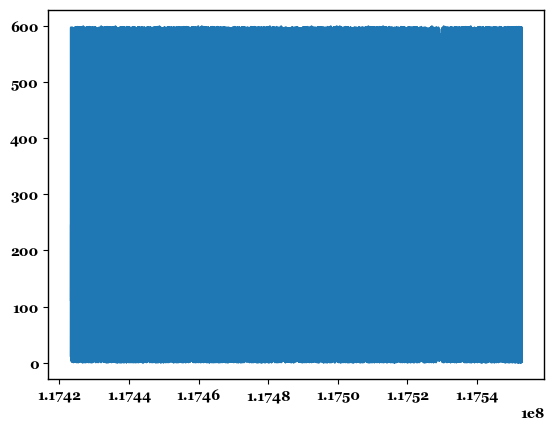

  Time Start:  117423318.07520103
  Time End:    117552866.61969094
EMOS 1
  Time Start:  117423317.62371193
  Time End:    117552923.55602345


Time Interval:  117423319.0 - 117552866.0


In [9]:
# Get Time Limits
print('EMOS 1')
hdul = fits.open('0327_0101440801_EMOS1_S001_ImagingEvts.ds')
e1 = Table(hdul[1].data)
e1.sort('TIME')

print('  Time Start: ', e1['TIME'][0])
print('  Time End:   ', e1['TIME'][-1])

print('EMOS 1')
hdul = fits.open('0327_0101440801_EMOS2_S002_ImagingEvts.ds')
e2 = Table(hdul[1].data)
e2.sort('TIME')

print('  Time Start: ', e2['TIME'][0])
print('  Time End:   ', e2['TIME'][-1])

print('\n\nTime Interval: ', np.ceil(np.max([e1['TIME'][0], e2['TIME'][0]])), '-', np.floor(np.min([e1['TIME'][-1], e2['TIME'][-1]])))

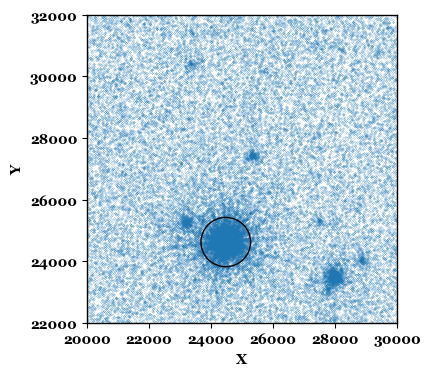



Extracting source LC




No time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(24475.391,24618.401,800))&&(PI in [200.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' r

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_lc.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_lc.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_lc.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && 

epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:16.000
Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:24.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:24.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS1_lc.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.113211553535364162
epiclccorr:- selected 1350 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDG

epiclccorr::evselect:- selected 1350 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:26.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:26.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS1_bkg_lc.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelqu

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-03T18:42:28.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:28.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-03T18:42:28.000
epiclccorr::arf

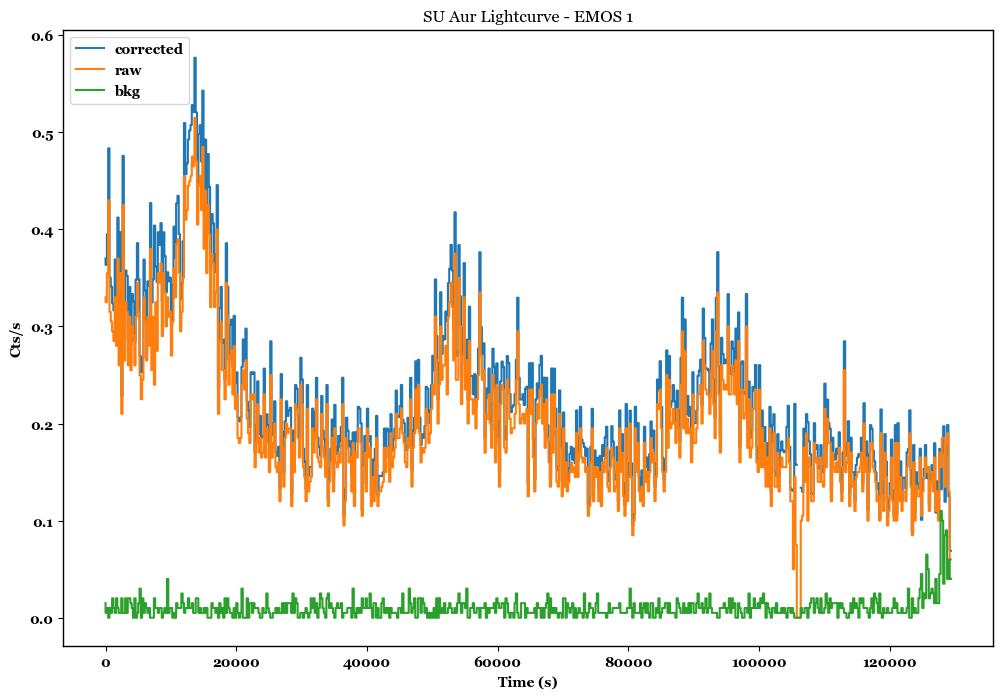

In [4]:
# SU Aur EMOS 1 Extraction

# Prepare
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400

q_flag       = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern    = 12          # Pattern selection
pi_min       = 200.        # Low energy range eV
pi_max       = 10000.      # High energy range eV
lc_bin       = 200         # Lightcurve bin in secs
t_min        = 117423319.0
t_max        = 117552866.0

event_file   = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
source_file  = 'SUAur_0101440801_EMOS1_lc.lc'
bkg_file     = 'SUAur_0101440801_EMOS1_bkg_lc.lc' 
final_file   = 'SUAur_0101440801_EMOS1_final_lc.lc'

# Extract
extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_1, radius, bkg_1, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# Plot
plt.figure(figsize=(12,8))  # Size of figure

plot_LC(plt, final_file, label='corrected')          # Plot corrected light curve
plot_LC(plt, source_file, label='raw')       # Plot source region light curve
plot_LC(plt, bkg_file, label='bkg')       # Plot background region light curve

plt.legend(loc='upper left')
plt.title('SU Aur Lightcurve - EMOS 1')
# plt.savefig('SUAur_LC_EMOS1.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

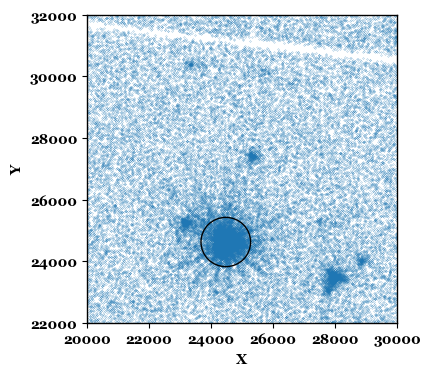



Extracting source LC




No time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(24476.384,24620.342,800.0))&&(PI in [200.0:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no'

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_lc.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_lc.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_lc.lc:REG00105,X,Y) && PI in [200:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_lc.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && 

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:44.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:44.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS2_lc.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.159131017381609396
epiclccorr:- selected 2082 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STDG

epiclccorr::evselect:- selected 2082 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:46.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:46.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS2_bkg_lc.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelqu

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-03T18:42:50.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T18:42:50.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-03T18:42:50.000
epiclccorr::arf

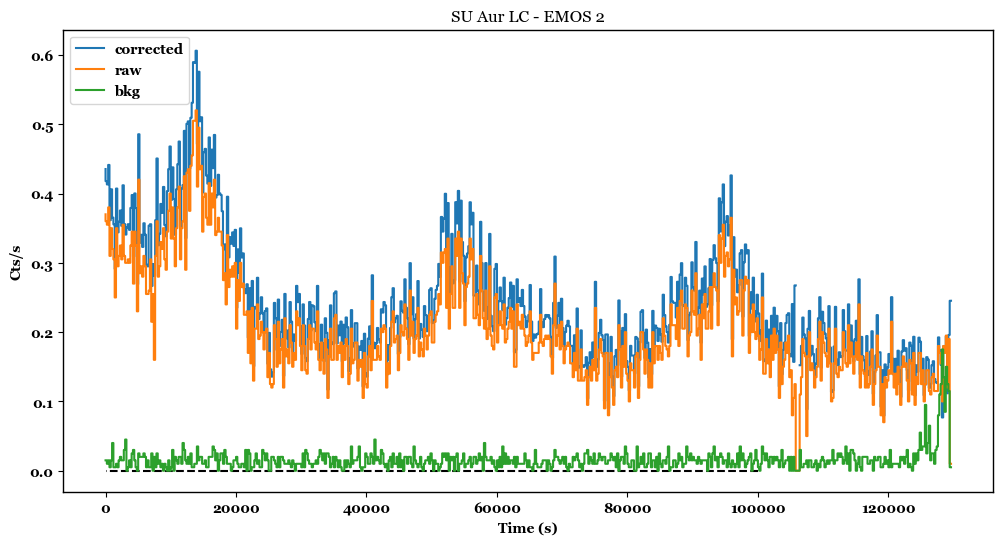

In [5]:
# SU Aur EMOS 2 Extraction

# Prepare
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.

q_flag       = "#XMMEA_EMOS2"
n_pattern    = 12          # Pattern selection
pi_min       = 200.        # Low energy range eV
pi_max       = 10000.      # High energy range eV
lc_bin       = 200         # Lightcurve bin in secs
t_min        = 117423319.0
t_max        = 117552866.0

event_file   = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
source_file  = 'SUAur_0101440801_EMOS2_lc.lc'
bkg_file     = 'SUAur_0101440801_EMOS2_bkg_lc.lc' 
final_file   = 'SUAur_0101440801_EMOS2_final_lc.lc'

# Extract
extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_2, radius, bkg_2, 
               bkg_radius, work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# Plot
plt.figure(figsize=(12,6))  # Size of figure
plot_LC(plt, final_file, label='corrected')          # Plot corrected light curve
plot_LC(plt, source_file, label='raw')       # Plot source region light curve
plot_LC(plt, bkg_file, label='bkg')       # Plot background region light curve
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur LC - EMOS 2')
plt.legend(loc='upper left')
plt.savefig('SUAur_LC_EMOS2.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

In [17]:
def rolling_median(y, window):
    median = np.zeros(len(y))
    for i in range(len(y)):
        median[i] = np.nanmedian(y[np.max([i-window, 0]) : np.min([i+window, len(y)])])
    return median

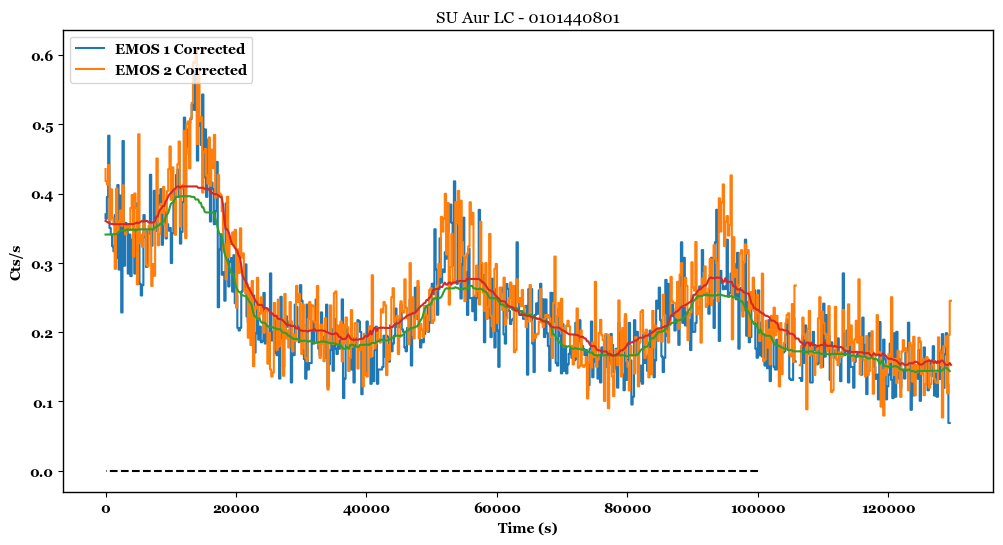

In [23]:
# Plot both SU Aur EMOS
plt.figure(figsize=(12,6))  # Size of figure
# plot_LC(plt, 'SUAur_0101440801_EMOS1_lc.lc', label='EMOS 1')
# plot_LC(plt, 'SUAur_0101440801_EMOS2_lc.lc', label='EMOS 2')
x1, y1 = plot_LC(plt, 'SUAur_0101440801_EMOS1_final_lc.lc', label='EMOS 1 Corrected')
x2, y2 = plot_LC(plt, 'SUAur_0101440801_EMOS2_final_lc.lc', label='EMOS 2 Corrected')
plt.plot(x1, rolling_median(y1, 30))
plt.plot(x2, rolling_median(y2, 30))
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur LC - 0101440801')
plt.legend(loc='upper left')
# plt.savefig('SUAur_LC_EMOS.pdf', bbox_inches='tight', pad_inches=0.1, format='pdf')
plt.show()

## EPN
The EPN was not operational for this observation, so there's nothing to extract

## Combine LC's

Executing: 
elcbuild sets='SUAur_0101440801_EMOS1_final_lc.lc SUAur_0101440801_EMOS1_final_lc.lc' outset='/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_lc.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_0101440801_EMOS1_final_lc.lc SUAur_0101440801_EMOS1_final_lc.lc' outset=/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_lc.lc  -w 1 -V 4
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-03T20:25:28.000
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-03T20:25:28.000
Filename: /Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_lc.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     76   648R x 5C   [2E, 2E, 2E, 2E, 2E]   


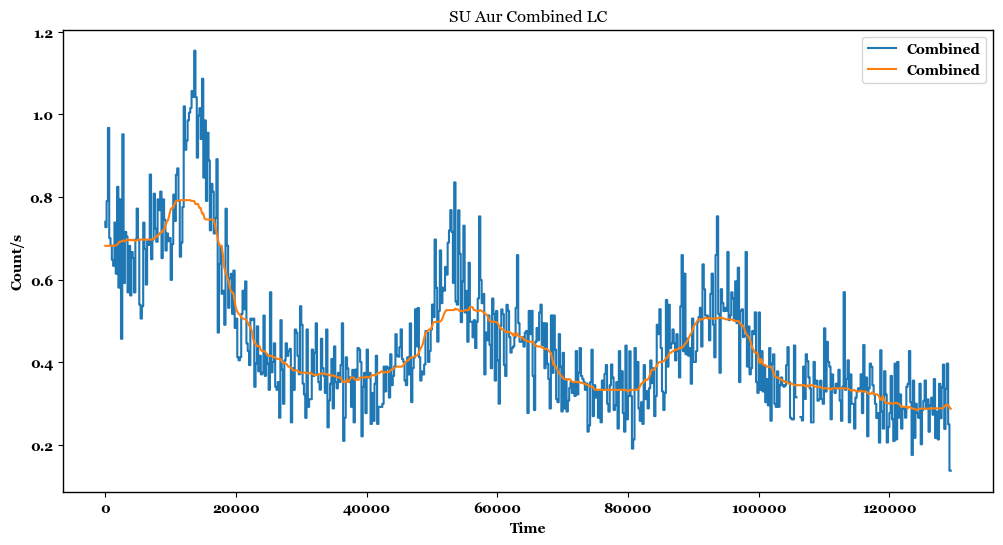

In [28]:
# Combine LCs
# - - - - - - - - - - - - - - - - 

combined_file = work_dir+'SUAur_0101440801_combined_lc.lc'   # Name of the output corrected lightcurve

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_0101440801_EMOS1_final_lc.lc SUAur_0101440801_EMOS1_final_lc.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

# Plot combined LC
hdul = fits.open(combined_file)
hdul.info()

lc = Table(hdul[1].data)

x = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']

plt.figure(figsize=(12,6))
plt.step(x, np.sum(lc['RATE'], 1), label='Combined')
plt.plot(x, rolling_median(np.sum(lc['RATE'], 1), 30), label='Combined')
plt.xlabel('Time')
plt.ylabel('Count/s')
plt.legend()
plt.title('SU Aur Combined LC')
plt.savefig('SUAur_combined_LC.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Soft and Hard LCs

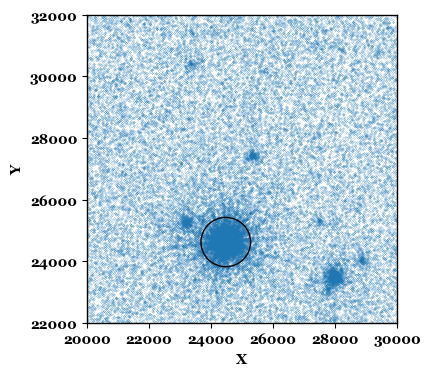



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(24475.391,24618.401,800))&&(PI in [200.0:1500])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimage

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_soft.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_soft.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_soft.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:42.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:42.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS1_soft.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.114084492326874898
epiclccorr:- selected 423 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STD

epiclccorr::evselect:- selected 423 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:43.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:43.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS1_bkg_soft.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelq

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:17:46.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:46.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:17:46.000
epiclccorr::arf

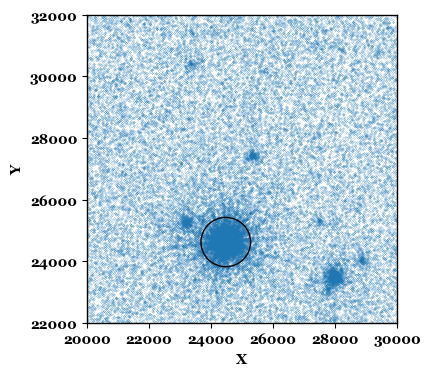



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12)&&((X,Y) IN circle(24475.391,24618.401,800))&&(PI in [1500:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raima

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS1_S001_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_hard.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_hard.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS1_hard.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN 

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:59.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:17:59.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS1_hard.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.111780078784949222
epiclccorr:- selected 929 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STD

epiclccorr::evselect:- selected 929 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:01.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:01.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS1_bkg_hard.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelq

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:04.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:04.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:04.000
epiclccorr::arf

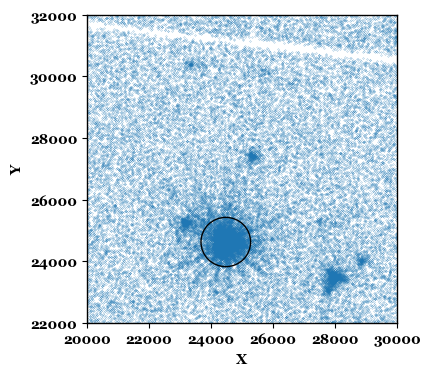



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(24476.384,24620.342,800.0))&&(PI in [200.0:1500])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raima

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_soft.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_soft.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_soft.lc:REG00105,X,Y) && PI in [200:1500] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_soft.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN in (

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:20.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:20.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS2_soft.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.159227524752900473
epiclccorr:- selected 657 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- STD

epiclccorr::evselect:- selected 657 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:21.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:21.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS2_bkg_soft.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes modelq

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:25.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:25.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:25.000
epiclccorr::arf

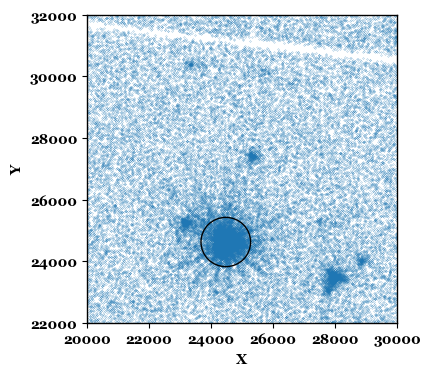



Extracting source LC




Time limits
Executing: 
evselect table='/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12)&&((X,Y) IN circle(24476.384,24620.342,800.0))&&(PI in [1500:10000.0])' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' rai

epiclccorr::evselect:- Executing (routine): evselect table=/Users/woodml/Observing/XMM-Newton/0101440801/0327_0101440801_EMOS2_S002_ImagingEvts.ds:EVENTS filteredset=filtered.fits withfilteredset=no keepfilteroutput=no flagcolumn=EVFLAG flagbit=-1 destruct=yes dssblock='' expression='( CCDNR in [1] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_hard.lc:STDGTI01,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [2] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_hard.lc:STDGTI02,TIME) && FLAG&0x766ba000==0 && PATTERN in (:12] && region(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_hard.lc:REG00105,X,Y) && PI in [1500:10000] ) || ( CCDNR in [3] && gti(/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_EMOS2_hard.lc:STDGTI03,TIME) && FLAG&0x766ba000==0 && PATTERN 

Making file temp_badcol.ds
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX01:RAWX and temp_badcol.ds:BADPIX01:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX02:RAWX and temp_badcol.ds:BADPIX02:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX03:RAWX and temp_badcol.ds:BADPIX03:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX04:RAWX and temp_badcol.ds:BADPIX04:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX05:RAWX and temp_badcol.ds:BADPIX05:RAWX is either non-existent or incomplete. Assuming a 1:1 mapping
epiclccorr::arfgen:- WCS info for the columns temp_badcol.ds:BADPIX06:RAWX and temp_badcol.ds:BADPIX06:RAWX is either non-existe

epiclccorr::arfgen:- Bad pixel & chip gap fraction: ~0 %
epiclccorr::arfgen:- Writing area data into dataset .. 
epiclccorr::arfgen:- Closing arfset on_ancillary.ds.
epiclccorr::arfgen:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:41.000
epiclccorr:- arfgen (arfgen-1.104)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:41.000
epiclccorr:- Done.
epiclccorr:- Reading ancillary file... spectrum_SUAur_0101440801_EMOS2_hard.lc
epiclccorr:- Done.
epiclccorr:- Weighted Mean 1.158953980747950974
epiclccorr:- selected 1427 rows from the source input table.
epiclccorr:- Closing event file dataset
epiclccorr:- Extraction region lies in CCD number 1
epiclccorr:- Calculating the relative corrections for each CCD...
epiclccorr:- STDGTI01 extension found 
epiclccorr:- Processing GTI extension: STDGTI01 corresponding to CCD 1
epiclccorr:- STDGTI02 extension found 
epiclccorr:- STDGTI03 extension found 
epiclccorr:- STDGTI04 extension found 
epiclccorr:- ST

epiclccorr::evselect:- selected 1427 rows from the input table.
** epiclccorr::evselect: warning (NonStandardSpectrum), The standard PI channel range for MOS is 0-11999. Detector matrices can not be created for this spectrum and spectral fitting will not be possible.
epiclccorr::evselect:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:42.000
epiclccorr:- evselect (evselect-3.71.2)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:42.000
epiclccorr:- Done.
epiclccorr:- Calculating arfgen...
epiclccorr:- Executing (invoked): arfgen spectrumset=spectrum_SUAur_0101440801_EMOS2_bkg_hard.lc rmfset=response.ds withrmfset=no arfset=bkg_ancillary.ds detmaptype=flat detmaparray=detmapfile.ds: detxoffset=1200 detyoffset=1200 withdetbounds=no detxbins=5 detybins=5 withdetbins=no psfenergy=2 filterdss=yes filteredset=filteredpixellist.ds withfilteredset=no sourcecoords=eqpos sourcex=0 sourcey=0 withsourcepos=no extendedsource=yes modeleffarea=yes model

epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:46.000
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:46.000
epiclccorr::arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
epiclccorr::arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:46.000
epiclccorr::arf

In [9]:
# SU Aur compare soft and hard LC
limit = 1500

# EMOS 1
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400

q_flag       = "#XMMEA_EMOS1" # Quality flag for EPIC pn
n_pattern    = 12             # Pattern selection
pi_min       = 200.           # Low energy range eV
pi_max       = limit          # High energy range eV
lc_bin       = 300         # Lightcurve bin in secs
t_min        = 117423319.0
t_max        = 117552866.0

event_file  = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
source_file = 'SUAur_0101440801_EMOS1_soft.lc'
bkg_file    = 'SUAur_0101440801_EMOS1_bkg_soft.lc'
final_file  = 'SUAur_0101440801_EMOS1_final_soft.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_1, radius, bkg_1, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# Hard
# - - - - - - - - - - -
pi_min       = limit          # Low energy range eV
pi_max       = 10000.         # High energy range eV
# others same as above

source_file = 'SUAur_0101440801_EMOS1_hard.lc'
bkg_file    = 'SUAur_0101440801_EMOS1_bkg_hard.lc'
final_file  = 'SUAur_0101440801_EMOS1_final_hard.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_1, radius, bkg_1, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# EMOS 2
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.

q_flag       = "#XMMEA_EMOS2" # Quality flag for EPIC mos
pi_min       = 200.           # Low energy range eV
pi_max       = limit          # High energy range eV
# others same as emos 1

event_file  = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
source_file = 'SUAur_0101440801_EMOS2_soft.lc'
bkg_file    = 'SUAur_0101440801_EMOS2_bkg_soft.lc'
final_file  = 'SUAur_0101440801_EMOS2_final_soft.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_2, radius, bkg_2, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# Hard
# - - - - - - - - - - -
pi_min       = limit          # Low energy range eV
pi_max       = 10000.         # High energy range eV
# others same as above

source_file = 'SUAur_0101440801_EMOS2_hard.lc'
bkg_file    = 'SUAur_0101440801_EMOS2_bkg_hard.lc'
final_file  = 'SUAur_0101440801_EMOS2_final_hard.lc'

extract_lc(q_flag, n_pattern, pi_min, pi_max, lc_bin, region_2, radius, bkg_2, bkg_radius, 
           work_dir, event_file, source_file, bkg_file, final_file, t_min, t_max)

# No EPN, so nothing to extract.

In [10]:
# Combine soft and hard LCs for SU Aur from EMOS and PN
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Soft
# - - - - - - - - - - -
combined_file = work_dir + 'SUAur_0101440801_combined_soft.lc'

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_0101440801_EMOS1_final_soft.lc SUAur_0101440801_EMOS2_final_soft.lc', # SUAur_EPN_final_lc_soft.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

# Hard 
# - - - - - - - - - - -
combined_file = work_dir+'SUAur_0101440801_combined_hard.lc'

# SAS Command
cmd        = "elcbuild" # SAS task to be executed                  

# Arguments of SAS Command
inargs     = [f'sets=SUAur_0101440801_EMOS1_final_hard.lc SUAur_0101440801_EMOS2_final_hard.lc', # SUAur_EPN_final_lc_hard.lc',
             f'outset={combined_file}']

w(cmd, inargs).run()

Executing: 
elcbuild sets='SUAur_0101440801_EMOS1_final_soft.lc SUAur_0101440801_EMOS2_final_soft.lc' outset='/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_soft.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_0101440801_EMOS1_final_soft.lc SUAur_0101440801_EMOS2_final_soft.lc' outset=/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_soft.lc  -w 1 -V 4
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T16:18:56.000
elcbuild:- elcbuild (elcbuild-1.10)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T16:18:56.000
Executing: 
elcbuild sets='SUAur_0101440801_EMOS1_final_hard.lc SUAur_0101440801_EMOS2_final_hard.lc' outset='/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_combined_hard.lc' 
elcbuild:- Executing (routine): elcbuild sets='SUAur_0101440801_EMOS1_final_hard.lc SUAur_0101440801_EMOS2_final_hard.lc' outset=/Users/woodml/Observing/XMM-Newton/0101440801/SUAur_0101440801_co

In [27]:
def rolling_median(y, window):
    median = np.zeros(len(y))
    for i in range(len(y)):
        median[i] = np.nanmedian(y[np.max([i-window, 0]) : np.min([i+window, len(y)])])
    return median

Filename: SUAur_0101440801_combined_soft.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     76   432R x 5C   [2E, 2E, 2E, 2E, 2E]   
Filename: SUAur_0101440801_combined_hard.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  RATE          1 BinTableHDU     76   432R x 5C   [2E, 2E, 2E, 2E, 2E]   


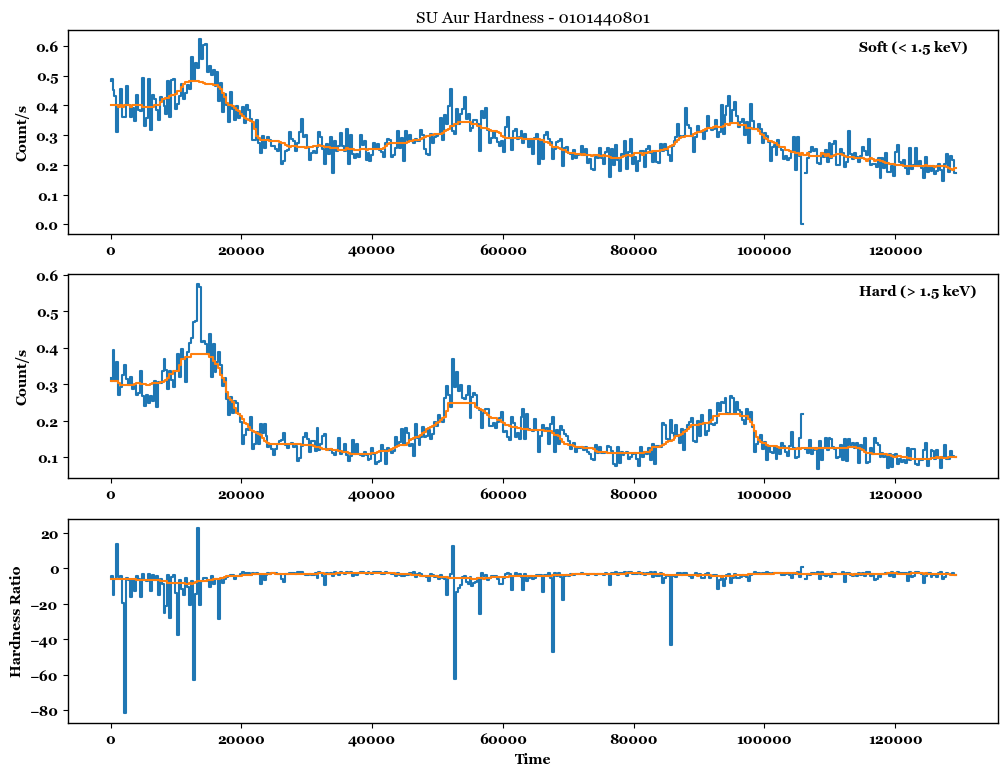

In [31]:
# Plot combined LC
hdul = fits.open('SUAur_0101440801_combined_soft.lc')
hdul.info()
lc_soft = Table(hdul[1].data)
x_soft = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']
y_soft = np.sum(lc_soft['RATE'], 1)

hdul = fits.open('SUAur_0101440801_combined_hard.lc')
hdul.info()
lc_hard = Table(hdul[1].data)
x_hard = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])-hdul[1].header['TSTART']
y_hard = np.sum(lc_hard['RATE'], 1)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,9))
ax[0].step(x_soft, y_soft, label='Soft (< 1.5 keV)')
ax[0].step(x_soft, rolling_median(y_soft, 15))
ax[0].text(0.85, 0.9, 'Soft (< 1.5 keV)',  transform=ax[0].transAxes)
ax[1].step(x_hard, y_hard, label='Hard (> 1.5 keV)')
ax[1].step(x_hard, rolling_median(y_hard, 15))
ax[1].text(0.85, 0.9, 'Hard (> 1.5 keV)',  transform=ax[1].transAxes)
ax[2].step(x_hard, (y_hard+y_soft)/(y_hard-y_soft))
ax[2].step(x_hard, rolling_median((y_hard+y_soft)/(y_hard-y_soft), 15))
ax[2].set_xlabel('Time')
ax[0].set_ylabel('Count/s')
ax[1].set_ylabel('Count/s')
ax[2].set_ylabel('Hardness Ratio')
ax[0].set_title('SU Aur Hardness - 0101440801')
plt.savefig('SUAur_0101440801_combined_hardness_LC.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

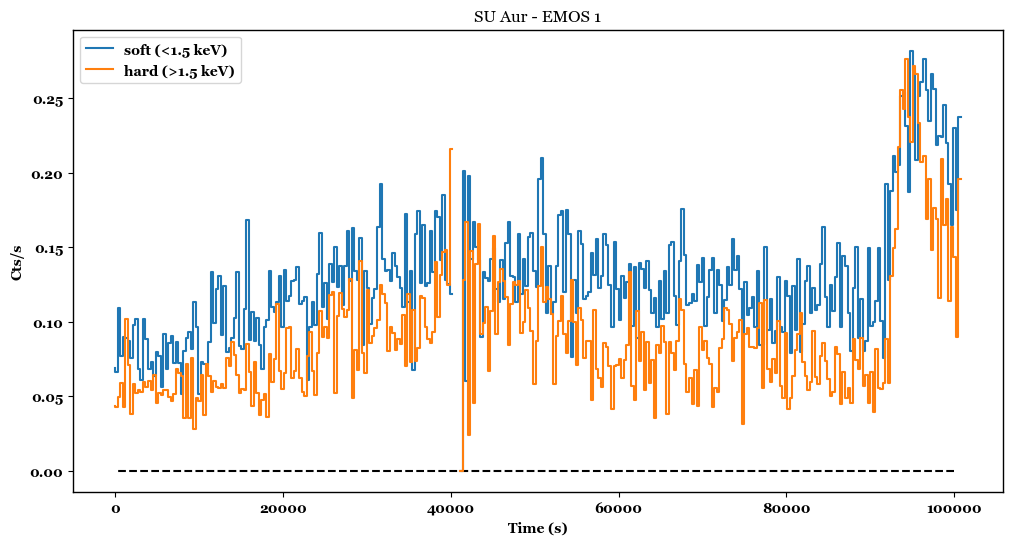

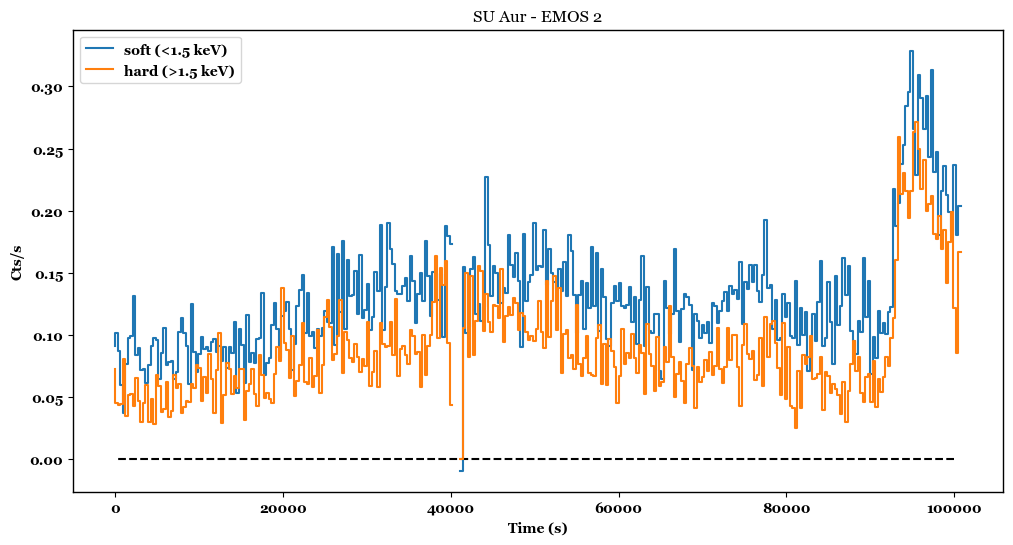

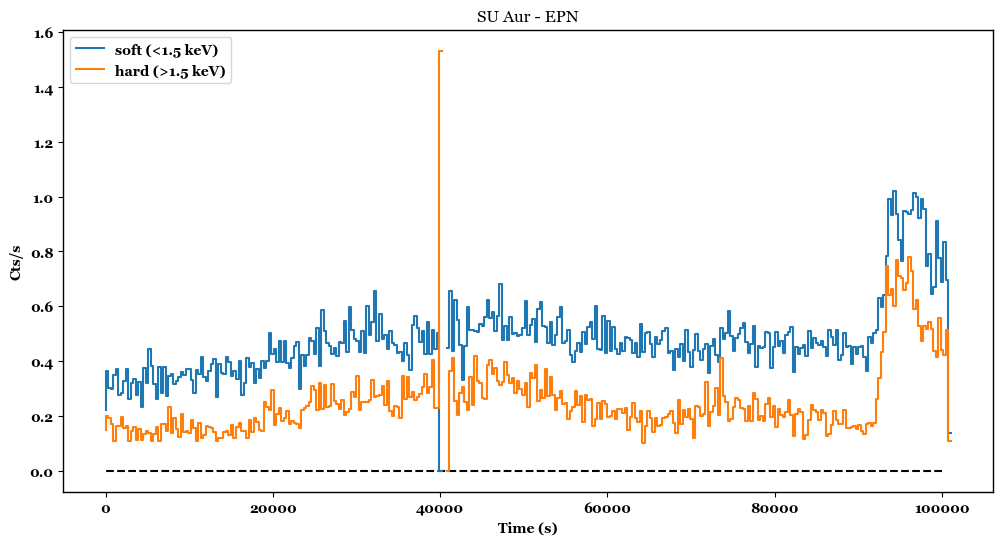

In [56]:
# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EMOS1_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EMOS1_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EMOS 1')
plt.legend(loc='upper left')
plt.show()

# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EMOS2_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EMOS2_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EMOS 2')
plt.legend(loc='upper left')
plt.show()

# PLOT
plt.figure(figsize=(12,6))  # Size of figure
plotLC(plt, 'SUAur_EPN_final_lc_soft.lc', label='soft (<1.5 keV)')
plotLC(plt, 'SUAur_EPN_final_lc_hard.lc', label='hard (>1.5 keV)')
plt.hlines(0,100000, 0, 'k','--', zorder=0)
plt.title('SU Aur - EPN')
plt.legend(loc='upper left')
plt.show()

# Define Flares

In [4]:
# Load 2002 Lightcurves
hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined.lc')
lc = Table(hdul[1].data)
x = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y = np.sum(lc['RATE'], 1)
y_err = np.sum(lc['ERROR'], 1)

hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined_soft.lc')
lc_soft = Table(hdul[1].data)
x_soft = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y_soft = np.sum(lc_soft['RATE'], 1)
y_err_soft = np.sum(lc_soft['ERROR'], 1)

hdul = fits.open('/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/SUAur_0101440801_combined_hard.lc')
lc_hard = Table(hdul[1].data)
x_hard = np.arange(hdul[1].header['TSTART'], hdul[1].header['TSTOP'], hdul[1].header['TIMEDEL'])
y_hard = np.sum(lc_hard['RATE'], 1)
y_err_hard = np.sum(lc_hard['ERROR'], 1)

/Users/woodml/anaconda3/envs/Observing/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


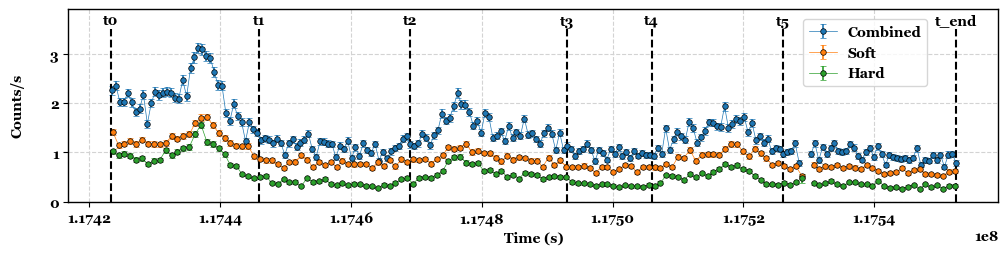

In [5]:
# Plot all SU Aur LCs, 0101440801
x3 = np.array([np.median(x[i:i+3]) for i in range(0,len(x),3)])
y3 = np.array([np.sum(y[i:i+3]) for i in range(0,len(x),3)])
y_err3 = np.array([np.sum(y_err[i:i+3])/3 for i in range(0,len(x),3)])

xs3 = np.array([np.median(x_soft[i:i+3]) for i in range(0,len(x_soft),3)])
ys3 = np.array([np.sum(y_soft[i:i+3]) for i in range(0,len(x_soft),3)])
ys_err3 = np.array([np.sum(y_err_soft[i:i+3])/3 for i in range(0,len(x_soft),3)])

xh3 = np.array([np.median(x_hard[i:i+3]) for i in range(0,len(x_hard),3)])
yh3 = np.array([np.sum(y_hard[i:i+3]) for i in range(0,len(x_hard),3)])
yh_err3 = np.array([np.sum(y_err_hard[i:i+3])/3 for i in range(0,len(x_hard),3)])

ratio_err = 2/(yh3+ys3)**2 * np.sqrt(ys3**2*yh_err3**2 + yh3**2*ys_err3**2)

t0 = 117423319
t1 = 117446000  # first flare end
t2 = 117469000  # second flare start
t3 = 117493000  # second flare end
t4 = 117506000  # third flare start
t5 = 117526000  # third flare end
t_end = x3[-1]

plt.figure(figsize=(12,2.5))
plt.errorbar(x3, y3, yerr=y_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Combined')
plt.errorbar(xs3, ys3, yerr=ys_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Soft')
plt.errorbar(xh3, yh3, yerr=yh_err3, lw=0.5, ms=8, marker='.', markeredgecolor='k', markeredgewidth=.5, capsize=2, elinewidth=1.2, label='Hard')
plt.vlines([t0, t1, t2, t3, t4, t5, t_end], 0, 3.5, 'k', '--')
plt.text(t0, 3.6, 't0', ha='center')
plt.text(t1, 3.6, 't1', ha='center')
plt.text(t2, 3.6, 't2', ha='center')
plt.text(t3, 3.6, 't3', ha='center')
plt.text(t4, 3.6, 't4', ha='center')
plt.text(t5, 3.6, 't5', ha='center')
plt.text(t_end, 3.6, 't_end', ha='center')
plt.grid('both','major',c='lightgray',ls='--', zorder=0)
plt.xlabel('Time (s)')
plt.ylabel('Counts/s', labelpad=18)
plt.ylim(0, 3.9)
plt.legend(loc=(0.79, 0.6))
plt.show()

# Spectra

Extracting three spectra:
1. The Full Spectrum
2. The Flare Spectrum
3. The Quiescent Spectrum

The flare spectrum includes only the first flare. The quiescent spectrum includes only the quiet parts between the three flares.

## Full

In [9]:
# SU Aur - EMOS 1

# Prepare
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS1_spec.fits'
bkg_file           = 'EMOS1_bkg_spec.fits'
response_file      = 'EPIC_MOS1.rmf'
ancillary_file     = 'EPIC_MOS1.anc'
final_file         = 'EMOS1_spec_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file)



Checking for Event Files...


File 0327_0101440801_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialc

In [10]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.
spec_min     = 0
spec_max     = 11999
bin_size     = 15

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec.fits'
bkg_file           = 'EMOS2_bkg_spec.fits'
response_file      = 'EMOS2.rmf'
ancillary_file     = 'EMOS2.anc'
final_file         = 'EMOS2_spec_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_2, radius, bkg_2, bkg_radius, spec_min,
                 spec_max, work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file)



Checking for Event Files...


File 0327_0101440801_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24476.384,24620.342,800.0))' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestia

arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T17:16:06.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    2024-01-08T17:16:06.000
arfgen:- Executing (routine): attcalc eventset=rawpixellist.ds:EVENTS fixedra=73.97325 fixeddec=30.585333 fixedposangle=83.562321 attitudelabel=fixed nominalra=73.97325 nominaldec=30.585333 setpnttouser=no refpointlabel=user atthkset=atthk.dat withatthkset=no withmedianpnt=yes calctlmax=no imagesize=0.36  -w 1 -V 4
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] started:  2024-01-08T17:16:06.000
arfgen:- attcalc (attcalc-4.39)  [xmmsas_20230412_1735-21.0.0] ended:    20

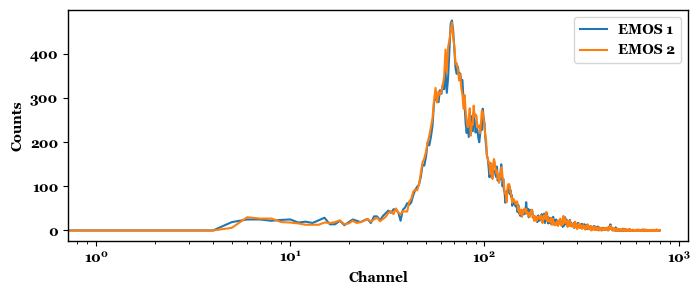

In [11]:
# Plot
plt.figure(figsize=(8,3))
plot_spectrum('EMOS1_spec_final.fits', label='EMOS 1')
plot_spectrum('EMOS2_spec_final.fits', label='EMOS 2')
plt.legend(loc='upper right')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.xscale('log')
plt.show()

## Flare

In [13]:
# EMOS 1

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t0
time_max     = t1

# Input Files
work_dir         = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file       = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file      = 'EMOS1_spec_flare.fits'
bkg_file         = 'EMOS1_bkg_spec_flare.fits'
response_file    = 'EMOS1_flare.rmf'
ancillary_file   = 'EMOS1_flare.anc'
final_file       = 'EMOS1_spec_flare_final.fits'

# Extract
extract_spectrum(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (117423319 < TIME) && (TIME < 117446000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatyp

In [14]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_2     = (24476.384, 24620.342)
radius       = 800.
bkg_2        = (24476.384, 21000.5) 
bkg_radius   = 1800.
spec_min     = 0
spec_max     = 11999
bin_size     = 15
time_min     = t0
time_max     = t1

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec_flare.fits'
bkg_file           = 'EMOS2_bkg_spec_flare.fits'
response_file      = 'EMOS2_flare.rmf'
ancillary_file     = 'EMOS2_flare.anc'
final_file         = 'EMOS2_spec_flare_final.fits'

extract_spectrum(q_flag, n_pattern, bin_size, region_2, radius, bkg_2, bkg_radius,spec_min,
                 spec_max, work_dir, event_file, source_file,bkg_file,response_file,ancillary_file, final_file,
                 time_min=time_min, time_max=time_max)



Checking for Event Files...


File 0327_0101440801_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...


Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24476.384,24620.342,800.0)) && (117423319 < TIME) && (TIME < 117446000)' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='no' imageset='image.fits' xcolumn='RAWX' ycolumn='RAWY' imagebinning='imageSize' ximagebinsize='1' yimagebinsize='1' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatat

## Quiet

In [6]:
# EMOS 1

# Parameters
q_flag       = "#XMMEA_EMOS1" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15

time_expression = f'(  ( ({t1} < TIME) && (TIME < {t2}) ) ||  ( ({t3} < TIME) && (TIME < {t4}) ) || ( ( {t5} < TIME) && (TIME < {t_end}) ) )'

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS1_S001_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS1_spec_quiet.fits'
bkg_file           = 'EMOS1_bkg_spec_quiet.fits'
response_file      = 'EMOS1_quiet.rmf'
ancillary_file     = 'EMOS1_qiuet.anc'
final_file         = 'EMOS1_spec_quiet_final.fits'

# Extract
extract_spectrum_time(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_expression=time_expression)



Checking for Event Files...


File 0327_0101440801_EMOS1_S001_ImagingEvts.ds exists. 



Extracting source spectrum...




Source Expression:  #XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )
Executing: 
evselect table='0327_0101440801_EMOS1_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS1&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='W

In [7]:
# EMOS 2

# Parameters
q_flag       = "#XMMEA_EMOS2" # Quality flag
n_pattern    = 12           # Pattern selection. Should be 12 for MOS detectors
region_1     = (24475.391, 24618.401)
radius       = 800
bkg_1        = (24475.391, 21000.5)
bkg_radius   = 1400
spec_min     = 0
spec_max     = 11999
bin_size     = 15

time_expression = f'(  ( ({t1} < TIME) && (TIME < {t2}) ) ||  ( ({t3} < TIME) && (TIME < {t4}) ) || ( ( {t5} < TIME) && (TIME < {t_end}) ) )'

# Input Files
work_dir           = '/Users/woodml/Observing/XMM-Newton/SU_Aur/0101440801/'
event_file         = '0327_0101440801_EMOS2_S002_ImagingEvts.ds'
# Output Files
source_file        = 'EMOS2_spec_quiet.fits'
bkg_file           = 'EMOS2_bkg_spec_quiet.fits'
response_file      = 'EMOS2_quiet.rmf'
ancillary_file     = 'EMOS2_qiuet.anc'
final_file         = 'EMOS2_spec_quiet_final.fits'

# Extract
extract_spectrum_time(q_flag, n_pattern, bin_size, region_1, radius, bkg_1, bkg_radius, spec_min, spec_max,
                 work_dir, event_file, source_file, bkg_file, response_file, ancillary_file, final_file,
                 time_expression=time_expression)



Checking for Event Files...


File 0327_0101440801_EMOS2_S002_ImagingEvts.ds exists. 



Extracting source spectrum...




Source Expression:  #XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )
Executing: 
evselect table='0327_0101440801_EMOS2_S002_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='#XMMEA_EMOS2&&(PATTERN<=12) && ((X,Y) IN circle(24475.391,24618.401,800)) && (  ( (117446000 < TIME) && (TIME < 117469000) ) ||  ( (117493000 < TIME) && (TIME < 117506000) ) || ( ( 117526000 < TIME) && (TIME < 117552515.136132) ) )' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PI' withzcolumn='no' zcolumn='W

## Plot

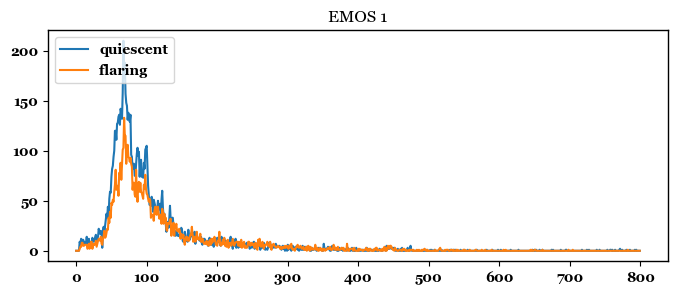

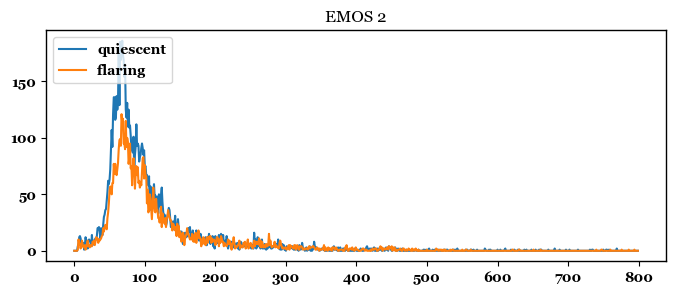

In [9]:
# EMOS 1
plt.figure(figsize=(8,3))
plot_spectrum('EMOS1_spec_quiet_final.fits', label='quiescent')
plot_spectrum('EMOS1_spec_flare_final.fits', label='flaring')
plt.title('EMOS 1')
plt.legend(loc='upper left')
plt.show()

# EMOS 2
plt.figure(figsize=(8,3))  # Size of figure
plot_spectrum('EMOS2_spec_quiet_final.fits', label='quiescent')
plot_spectrum('EMOS2_spec_flare_final.fits', label='flaring')
plt.title('EMOS 2')
plt.legend(loc='upper left')
plt.show()